In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from sklearn.utils import shuffle

In [0]:
data=pd.read_csv("/content/drive/My Drive/DataDeepLearning/handwritten_data.csv")
data=shuffle(data)

In [0]:
data=data.reset_index(drop=True)

In [0]:
images=data.drop('0',axis=1)

In [0]:
targets=data['0']

In [8]:
images.head()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,...,0.532,0.533,0.534,0.535,0.536,0.537,0.538,0.539,0.540,0.541,0.542,0.543,0.544,0.545,0.546,0.547,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
img1=images.loc[1]

In [0]:
img1=np.array(img1).reshape(28,28)

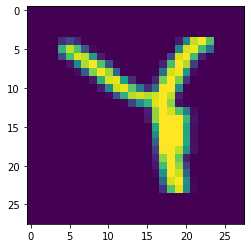

In [11]:
plt.imshow(img1)

In [12]:
targets

0         19
1         24
2          0
3         22
4         18
          ..
372032     0
372033    14
372034     6
372035    15
372036    25
Name: 0, Length: 372037, dtype: int64

In [0]:
img0=images.loc[0]

In [14]:
type(img0)

pandas.core.series.Series

In [0]:
length=len(targets)

In [0]:
valid_length=30000

In [0]:
test_index=length-valid_length

In [18]:
test_index

342037

In [0]:
X_train=images[:test_index]
X_valid=images[test_index:]

In [20]:
X_train.shape, X_valid.shape

((342037, 784), (30000, 784))

In [0]:
y_train=targets[:test_index]
y_valid=targets[test_index:]

In [22]:
type(img1)

numpy.ndarray

In [0]:
x_train=[]
for i in range(test_index):
    img=X_train.loc[i]
    img=np.array(img).reshape(28,28)
    x_train.append(img)

In [0]:
x_valid=[]
for i in range(test_index,length):
    img=X_valid.loc[i]
    img=np.array(img).reshape(28,28)
    x_valid.append(img)

In [0]:
x_train=np.array(x_train)/255
x_valid=np.array(x_valid)/255

In [35]:
x_valid.shape

(30000, 28, 28)

In [0]:
x_train=x_train.reshape(342037,28,28,1)
x_valid=x_valid.reshape(30000,28,28,1)

In [0]:
labels={0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',
        14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [0]:
y_cat_train=to_categorical(y_train)
y_cat_valid=to_categorical(y_valid)

In [42]:
y_cat_train.shape, y_cat_valid.shape

((342037, 26), (30000, 26))

In [0]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),
                 input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(4,4),
                 input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(26,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=1)

In [45]:
model.fit(x_train,y_cat_train,epochs=10,
          validation_data=(x_valid,y_cat_valid),
          callbacks=[early_stop])

Epoch 1/10
10689/10689 [==============================] - 36s 3ms/step - loss: 0.1281 - accuracy: 0.9650 - val_loss: 0.0789 - val_accuracy: 0.9777
Epoch 2/10
10689/10689 [==============================] - 36s 3ms/step - loss: 0.0554 - accuracy: 0.9851 - val_loss: 0.0595 - val_accuracy: 0.9838
Epoch 3/10
10689/10689 [==============================] - 36s 3ms/step - loss: 0.0387 - accuracy: 0.9891 - val_loss: 0.0515 - val_accuracy: 0.9855
Epoch 4/10
10689/10689 [==============================] - 36s 3ms/step - loss: 0.0287 - accuracy: 0.9915 - val_loss: 0.0466 - val_accuracy: 0.9861
Epoch 5/10
10689/10689 [==============================] - 36s 3ms/step - loss: 0.0231 - accuracy: 0.9929 - val_loss: 0.0426 - val_accuracy: 0.9898
Epoch 6/10
10689/10689 [==============================] - 37s 3ms/step - loss: 0.0181 - accuracy: 0.9943 - val_loss: 0.0421 - val_accuracy: 0.9903
Epoch 7/10
10689/10689 [==============================] - 37s 3ms/step - loss: 0.0157 - accuracy: 0.9950 - val_loss: 0

In [0]:
preds=model.predict(x_valid)

In [47]:
preds

array([[6.47972596e-24, 1.59890587e-20, 3.63438015e-17, ...,
        0.00000000e+00, 8.95911298e-18, 7.32561192e-34],
       [6.97976358e-20, 1.14268109e-10, 5.22547694e-09, ...,
        3.35509588e-13, 1.80134143e-14, 1.79707169e-11],
       [1.00234520e-37, 5.75902400e-20, 2.92174642e-23, ...,
        3.05417597e-35, 4.32960788e-30, 4.50497018e-28],
       ...,
       [2.13887080e-35, 1.00167074e-18, 7.57043613e-21, ...,
        0.00000000e+00, 1.86420886e-38, 2.89441664e-35],
       [3.68333166e-15, 1.49654078e-15, 8.47422079e-28, ...,
        4.93409847e-27, 7.78660194e-26, 2.66206956e-21],
       [2.20419422e-25, 4.09794659e-19, 1.08584228e-14, ...,
        1.13628724e-14, 3.14882314e-17, 1.00000000e+00]], dtype=float32)

In [0]:
model.save('alpha.h5')

In [52]:
preds[0]

array([6.4797260e-24, 1.5989059e-20, 3.6343801e-17, 1.0407084e-15,
       6.0304297e-29, 7.4629614e-38, 3.1573288e-16, 4.6557003e-25,
       0.0000000e+00, 4.7109405e-17, 1.8377067e-34, 8.7942125e-25,
       2.2679584e-19, 3.2783825e-17, 1.0000000e+00, 2.2763438e-23,
       7.1374452e-15, 8.1558057e-34, 2.6791172e-18, 3.9721259e-18,
       9.3158281e-10, 1.5997052e-35, 6.8202541e-27, 0.0000000e+00,
       8.9591130e-18, 7.3256119e-34], dtype=float32)

In [0]:
valid_preds=list(np.argmax(preds,axis=1))

In [0]:
y_values=list(y_valid)

In [0]:
pred=pd.DataFrame(y_values,columns=['True'])

In [0]:
pred['Predict']=valid_preds

In [68]:
pred.head()

,True,Predict
0,14,14
1,8,8
2,18,18
3,19,19
4,3,3
